## Plan for Dominant Del Assay plasmid pPS1

In [1]:
from IPython.display import Image
Image(url='http://cancerres.aacrjournals.org/content/66/7/3480/F1.medium.gif')

### The del assay

The image above depicts the principle of the original del assay.

http://cancerres.aacrjournals.org/content/66/7/3480.abstract?sid=9297eb2f-00bd-466f-89d8-b38af175d67f

The RS112 yeast strain contains a plasmid carrying the LEU2 gene and an internal fragment of the yeast HIS3 gene integrated into the genome at the HIS3 locus. This resulted in two copies of the his3 gene, one with a terminal deletion at the 3'-end, and the other with a terminal deletion at the 5'-end. There are ~400 bp of homology between the two copies (striped region). B, DNA strand breakage leads to bidirectional degradation until homologous single-stranded regions are exposed. C, annealing of homologous regions. D, reversion to HIS+ phenotype and deletion of plasmid.

### the pPS1 plasmid

This cassette consists of two dominant markers HphMX4 and the kanamycin resistance gene from the E. coli transposon TN903 "kan".

The HphMX4 marker is the Hygromycin B resistance gene from an E. coli [plasmid](http://www.ncbi.nlm.nih.gov/pubmed/6319235) under control of the Ashbya gossypii TEF1 promoter and terminator.

The idea is to split the HphMX4 marker in two pieces so that there is a shared homology, like the HIS3 gene of the del assay. The kan gene will be controlled by the promoter and terminator from the Kluyveromyces lactis TEF1 homolog. 

The TEF1 promoter-kan-TEF1 terminator fragments are cloned inside the HphMX4 marker in such a way that there is a region of homology on each side by which the TEF1 promoter-kan-TEF1 terminator can be lost and the HphMX4 gene reconstituted. 

The whole construct is made by gap repair in one reaction.


###material

|DNA      | Source  -80      |
|---------|------------------|
|pAG32    | box 3	pos 45   |
|pMEC1030 | Filipa #114      |
|pUG6     | box 3	pos 55   |
|YIplac128| box 1   pos 81   |


K. lactis is on plate

In [2]:
import pydna

The plasmid pAG32 contains the HphMX4 marker gene. It is available from [EUROSCARF](http://www.euroscarf.de/plasmid_details.php?accno=P30106). It was constructed by [Goldstein & McCusker](http://www.ncbi.nlm.nih.gov/pubmed/10514571).

The sequence is not available from Genbank, but the EUROSCARF website provides it. Unfortunately, the LOCUS line is malformed in this record (genbank format). For this reason I made my own copy of the sequence [here](https://gist.github.com/BjornFJohansson/c5424b7ebbf553c52053). The size of the plasmid is 4160 bp.

In [3]:
text  = pydna.download_text("https://gist.githubusercontent.com/BjornFJohansson/c5424b7ebbf553c52053/raw/64318ead495bc7ade8bb598ab192e76a3569a724/pAG32.gb")
pAG32 = pydna.read(text)

In [4]:
pAG32

Dseqrecord(o4160)

In [5]:
pAG32.list_features()

+----------+-----------+-------+------+--------+--------------+--------------+------+
| Feature# | Direction | Start | End  | Length | id           | type         | orf? |
+----------+-----------+-------+------+--------+--------------+--------------+------+
| 0        |    -->    |   90  | 458  |    368 | <unknown id> | misc_feature |  no  |
| 1        |    -->    |  458  | 1487 |   1029 | <unknown id> | CDS          | yes  |
| 2        |    -->    |  1487 | 1727 |    240 | <unknown id> | misc_feature |  no  |
| 3        |    <--    |  2832 | 3693 |    861 | <unknown id> | CDS          | yes  |
+----------+-----------+-------+------+--------+--------------+--------------+------+

We can inspect the features to see that the HphMX4 cassete starts at 90 and ends at 1727

In [6]:
hyg_cassette = pAG32[90:1727]

This makes the HphMX4 cassette 1637 bp long.

In [7]:
hyg_cassette

Dseqrecord(-1637)

In [8]:
middle = int(len(hyg_cassette)/2)
overlap = 200

We split the HphMX4 in two parts:

In [9]:
first_part = hyg_cassette[:middle+overlap]
second_part = hyg_cassette[(middle-overlap):]

In [10]:
pydna.eq( first_part[-400:], second_part[:400] )

True

In [11]:
str(first_part[-400:].seq)

'TCAGCGAGAGCCTGACCTATTGCATCTCCCGCCGTGCACAGGGTGTCACGTTGCAAGACCTGCCTGAAACCGAACTGCCCGCTGTTCTGCAGCCGGTCGCGGAGGCCATGGATGCGATCGCTGCGGCCGATCTTAGCCAGACGAGCGGGTTCGGCCCATTCGGACCGCAAGGAATCGGTCAATACACTACATGGCGTGATTTCATATGCGCGATTGCTGATCCCCATGTGTATCACTGGCAAACTGTGATGGACGACACCGTCAGTGCGTCCGTCGCGCAGGCTCTCGATGAGCTGATGCTTTGGGCCGAGGACTGCCCCGAAGTCCGGCACCTCGTGCACGCGGATTTCGGCTCCAACAATGTCCTGACGGACAATGGCCGCATAACAGCGGTCATTGA'

Now we need to define the promoter and terminator to use for the kan gene.

K. lactis sequences are from the [Yeast Gene Order Browser](http://ygob.ucd.ie/)


The Kl TEF1 promoter has the following [sequence](http://ygob.ucd.ie/cgi/browser/intergenic.pl?ver=Latest&gene=KLLA0B09020g&org=klac&nbr=KLLA0B08998g&dir=inverted)

The Kl TEF1 promoter has the following [sequence](http://ygob.ucd.ie/cgi/browser/intergenic.pl?ver=Latest&gene=KLLA0B08998g&org=klac&nbr=KLLA0B08976g&dir=inverted)

In [12]:
promoter_link ="http://ygob.ucd.ie/cgi/browser/intergenic.pl?ver=Latest&gene=KLLA0B09020g&org=klac&nbr=KLLA0B08998g&dir=inverted" 

In [13]:
terminator_link = "http://ygob.ucd.ie/cgi/browser/intergenic.pl?ver=Latest&gene=KLLA0B08998g&org=klac&nbr=KLLA0B08976g&dir=inverted"

In [14]:
from bs4 import BeautifulSoup

In [15]:
html = pydna.download_text(promoter_link)

In [16]:
TEF1prom = pydna.read( ''.join( BeautifulSoup( html, "lxml").findAll( text = True ) ) )

/home/bjorn/python_packages/pydna/pydna/dseqrecord.py:197: UserWarning: name property Intergenic-KLLA0B09020g-KLLA0B08998g truncated to 16 chars Intergenic-KLLA0
  _warn("name property {} truncated to 16 chars {}".format(self.name, short_name))


In [17]:
TEF1prom

Dseqrecord(-1421)

About 400bp is sufficient for the promoter

In [18]:
TEF1prom = TEF1prom[-400:]

We establish the terminator in the same manner

In [19]:
html = pydna.download_text(terminator_link)

In [20]:
TEF1term = pydna.read( ''.join( BeautifulSoup( html, "lxml").findAll( text = True ) ) )

/home/bjorn/python_packages/pydna/pydna/dseqrecord.py:197: UserWarning: name property Intergenic-KLLA0B08998g-KLLA0B08976g truncated to 16 chars Intergenic-KLLA0
  _warn("name property {} truncated to 16 chars {}".format(self.name, short_name))


In [21]:
TEF1term

Dseqrecord(-457)

Likewise, 400bp is more than enough for the terminator

In [22]:
TEF1term = TEF1term[:400]

The kan gene can be found in the pUG6 plasmid. It was constructed by [Güldener et al.](http://nar.oxfordjournals.org/content/24/13/2519.full).
The sequence is available from [Genbank](http://www.ncbi.nlm.nih.gov/nuccore/AF298793.1). The plasmid itself can be obtained from [EUROSCARF](http://www.euroscarf.de/plasmid_details.php?accno=P30114).

We will download the sequence from Genbank:

In [23]:
gb = pydna.Genbank("bjornjobb@gmail.com")

In [24]:
pUG6 = gb.nucleotide("AF298793")

The size is 4009bp

In [25]:
len(pUG6)

4009

In [26]:
pUG6

Gbank(AF298793)(o4009)

We can inspect features to obtain the coding sequence:

In [27]:
pUG6.list_features()

+----------+-----------+-------+------+--------+--------------+--------------+------+
| Feature# | Direction | Start | End  | Length | id           | type         | orf? |
+----------+-----------+-------+------+--------+--------------+--------------+------+
| 0        |    -->    |   0   | 4009 |   4009 | <unknown id> | source       |  no  |
| 1        |    -->    |   52  |  86  |     34 | <unknown id> | misc_feature |  no  |
| 2        |    -->    |   86  | 484  |    398 | <unknown id> | regulatory   |  no  |
| 3        |    -->    |  484  | 1294 |    810 | <unknown id> | gene         | yes  |
| 4        |    -->    |  484  | 1294 |    810 | <unknown id> | CDS          | yes  |
| 5        |    -->    |  1294 | 1559 |    265 | <unknown id> | regulatory   |  no  |
| 6        |    -->    |  1559 | 1593 |     34 | <unknown id> | misc_feature |  no  |
| 7        |    <--    |  2681 | 3542 |    861 | <unknown id> | gene         | yes  |
| 8        |    <--    |  2681 | 3542 |    861 | <unkn

The feature number 4 is the coding sequence for the kan gene:

In [28]:
kan_orf = pUG6.extract_feature(4)

Now we have defined five DNA fragments between 0.4 and 1.1 kb

In [29]:
pMEC1030 = pydna.read("pMEC1030.gb")

## We could not prep the pMEC1030, so we use pSU0 instead. The name is still pMEC1030 in the code below.

In [30]:
pSU0 = gb.nucleotide("AB215109.1")

In [31]:
pMEC1030 = pSU0

In [32]:
URA3_2micron = pMEC1030[1041:3620]

In [33]:
frags = (URA3_2micron,
         first_part,
         TEF1prom,
         kan_orf,
         TEF1term,
         second_part)

In [34]:
frags

(Gbank(AB215109.1)(-2579),
 Dseqrecord(-1018),
 Dseqrecord(-400),
 Gbank(AF298793)(-810),
 Dseqrecord(-400),
 Dseqrecord(-1019))

We will also need a vector backbone for the construction. We will use YIplac128.

In [35]:
YIplac128 = gb.nucleotide("X75463").looped()
from Bio.Restriction import SmaI
YIplac128_smaI = YIplac128.linearize(SmaI)

In [36]:
from Bio.Restriction import XhoI, SpeI

# There is a bug below! The SpeI site was added to the end of the "first_part" and not to the beginning!





In [37]:
((p1,  p2), 
 (p3,  p4), 
 (p5,  p6), 
 (p7,  p8), 
 (p9,  p10),
 (p11, p12))= pydna.assembly_primers((second_part,
                                      pydna.Dseqrecord( XhoI.site ),
                                      URA3_2micron,
                                      pydna.Dseqrecord( SpeI.site ),
                                      first_part,                                      
                                      TEF1prom, 
                                      kan_orf, 
                                      TEF1term),                                       
                                      vector=YIplac128_smaI, target_tm=50)

In [38]:
p1.id=  "dda1_2nd_f"
p2.id=  "dda2_2nd_r"
p3.id=  "dda3_URA3_2my_f"
p4.id=  "dda4_URA3_2my_r"
p5.id=  "dda5_1st_f"
p6.id=  "dda6_1st_r"
p7.id=  "dda7_Kl_pr_f"
p8.id=  "dda8_Kl_pr_r"
p9.id=  "dda9_kan_f"
p10.id= "dda10_kan_r"
p11.id= "dda11_Kl_tr_f"
p12.id= "dda12_Kl_tr_r"

In [39]:
(p2, p3, p4, p5, p6, p7, p8, p9, p10, p11) = [p[-40:] for p in (p2, p3, p4, p5, p6, p7, p8, p9, p10, p11)]    

In [40]:
p1=p1[-50:]
p12=p12[-50:]

In [41]:
second_part_prd = pydna.pcr(p1,p2, pAG32)
URA3_2micron_prd = pydna.pcr(p3,p4, pMEC1030)
first_part_prd = pydna.pcr(p5,p6, pAG32)
prom_prd = pydna.pcr(p7, p8, TEF1prom)
kan_prd = pydna.pcr(p9, p10, pUG6)
term_prd = pydna.pcr(p11, p12, TEF1term)

In [42]:
prods = (URA3_2micron_prd,
         first_part_prd,
         prom_prd,
         kan_prd,
         term_prd,
         second_part_prd)

In [43]:
names = ("URA3_2my",
         "prom-Hph",
         "KlTEF1prom",
         "kan_orf",
         "KlTEF1term",
         "Hph-term")

In [44]:
for f,n in zip(prods, names):
    f.name = n

In [45]:
asm = pydna.Assembly(( YIplac128_smaI,
                       URA3_2micron_prd,
                       first_part_prd,
                       prom_prd,
                       kan_prd,
                       term_prd,
                       second_part_prd), limit = 26)

In [46]:
asm

Assembly:
Sequences........................: [4302] [2617] [1053] [439] [846] [442] [1074]
Sequences with shared homologies.: [4302] [442] [1074] [2617] [1053] [439] [846]
Homology limit (bp)..............: 26
Number of overlaps...............: 8
Nodes in graph(incl. 5' & 3')....: 10
Only terminal overlaps...........: No
Circular products................: [10540] [6318] [4222]
Linear products..................: [10792] [10620] [10576] [10576] [10575] [10574] [10574] [10572] [10566] [10169] [10158] [9980] [9764] [9564] [9554] [9536] [9357] [9348] [9151] [8941] [8339] [7994] [7923] [7392] [7371] [7164] [6973] [6954] [6900] [6839] [6760] [6757] [6570] [6492] [6354] [6352] [6352] [6350] [6344] [6298] [5947] [5936] [5933] [5890] [5758] [5682] [5542] [5530] [5342] [5296] [5275] [5260] [5135] [5126] [5080] [4852] [4719] [4718] [4673] [4258] [4257] [4042] [3655] [3635] [2678] [2270] [2076] [1676] [1668] [1657] [1460] [1254] [1249] [858] [451] [36] [36] [35] [34] [34] [32] [26]

In [47]:
candidate = asm.circular_products[0]
candidate.figure()

 -|X75463|34
|         \/
|         /\
|         34|Hph-term|36
|                     \/
|                     /\
|                     36|URA3_2my|35
|                                 \/
|                                 /\
|                                 35|prom-Hph|32
|                                             \/
|                                             /\
|                                             32|KlTEF1prom|36
|                                                           \/
|                                                           /\
|                                                           36|kan_orf|34
|                                                                      \/
|                                                                      /\
|                                                                      34|KlTEF1term|26
|                                                                                    \/
|                                        

In [48]:
pPS1 = candidate

In [49]:
pPS1.cseguid()

vXelWQ46lP0x8856rBYXpzFaSTk

In [50]:
primers = (p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)
[len(p) for p in primers]

[50, 37, 37, 40, 34, 40, 37, 37, 34, 34, 40, 50]

In [51]:
for p in primers:
    print(p.format("tab"))

dda1_2nd_f	TTGCATGCCTGCAGGTCGACTCTAGAGGATCCCCTCAGCGAGAGCCTGAC

dda2_2nd_r	AGCGGTATTCGCAATCTCGAGTCGACACTGGATGGCG

dda3_URA3_2my_f	GCCATCCAGTGTCGACTCGAGATTGCGAATACCGCTT

dda4_URA3_2my_r	GGGTGACCCGGCGGGGATAATAACTGATATAATTAAATTG

dda5_1st_f	TAATTATATCAGTTATTATCCCCGCCGGGTCACC

dda6_1st_r	GACCCAGTGTTACTAGTTCAATGACCGCTGTTATGCGGCC

dda7_Kl_pr_f	AACAGCGGTCATTGAACTAGTAACACTGGGTCAATCA

dda8_Kl_pr_r	AGTCTTTTCCTTACCCATTTTTAATGTTACTTCTCTT

dda9_kan_f	AGAGAAGTAACATTAAAAATGGGTAAGGAAAAGA

dda10_kan_r	AGTAGTATCAAGTTAAACTTAGAAAAACTCATCG

dda11_Kl_tr_f	CGATGAGTTTTTCTAAGTTTAACTTGATACTACTAGATTT

dda12_Kl_tr_r	GGCCAGTGAATTCGAGCTCGGTACCCTTAGTATTAGTAAATTTGTTGACA



In [52]:
pPS1.name = "pPS1"
pPS1.description=""

In [53]:
pPS1.stamp()

cSEGUID_vXelWQ46lP0x8856rBYXpzFaSTk_2017-01-12T11:01:45.222270

In [54]:
pPS1.write("pPS1.gb")

In [55]:
r = pydna.read("pPS1.gb")

In [56]:
r.verify_stamp()

cSEGUID_vXelWQ46lP0x8856rBYXpzFaSTk

##PCR conditions

In [57]:
for prd in prods:
    print("product name:", prd.name)
    print("template:", prd.template.name)
    print(prd.program())
    print("----------------------------------------------------------")

product name: URA3_2my
template: AB215109

Taq (rate 30 nt/s) 35 cycles             |2617bp
95.0°C    |95.0°C                 |      |Tm formula: Biopython Tm_NN
|_________|_____          72.0°C  |72.0°C|SaltC 50mM
| 03min00s|30s  \         ________|______|Primer1C 1.0µM
|         |      \ 51.1°C/ 1min19s| 5min |Primer2C 1.0µM
|         |       \_____/         |      |GC 39%
|         |         30s           |      |4-12°C
----------------------------------------------------------
product name: prom-Hph
template: pAG32

Taq (rate 30 nt/s) 35 cycles             |1053bp
95.0°C    |95.0°C                 |      |Tm formula: Biopython Tm_NN
|_________|_____          72.0°C  |72.0°C|SaltC 50mM
| 03min00s|30s  \         ________|______|Primer1C 1.0µM
|         |      \ 61.7°C/ 0min32s| 5min |Primer2C 1.0µM
|         |       \_____/         |      |GC 54%
|         |         30s           |      |4-12°C
----------------------------------------------------------
product name: KlTEF1prom
templa

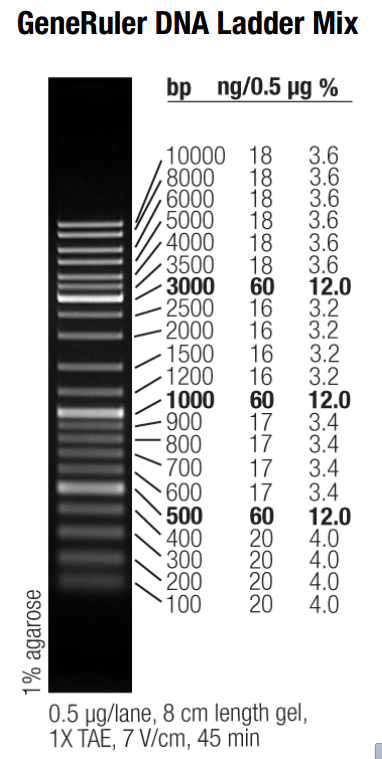

In [58]:
from IPython.display import Image
#Image("Generuler_1kb_marker_Fermentas_SM0331.jpg")
Image("Paulo_GeneRuler.png")

# Use

The plan is to integrate the cassette so that the HIS3 marker is removed. We chose HIS3 since this is the location of the del construct in RS112 and derivatives. 

We should use a leu2 HIS3 background for the integration.

The resulting strain should be G418R his3 LEU2 and HygS. After recombination, the cells will be G418S his3 eu2 and HygR.

The cassette will be amplified so that the 2µ and URA3 sequences are left out.






In [59]:
from pygenome import sg

In [60]:
his3 = pydna.Dseqrecord( sg.gene["HIS3"].locus() )

The his3 sequence contain the whole HIS3 locus including promoter and terminator.

In [61]:
his3.write("his3.gb")

Paulo suggested these primers for integration of cassette in the HIS3 locus

In [62]:
intprim1, intprim2 = pydna.parse('''
>F
CTT TCC CGC AAT TTT CTT TTT CTA TTA CTC TTG GCC TCC T    aaaactgtattataagta

>R
TAT ATA TAT CGT ATG CTG CAG CTT TAA ATA ATC GGT GTC A gcg TT AGT ATC GAA TCG ACA G
''')

After discussion we arrived at the final primers below:

In [63]:
intprim1, intprim2 = pydna.parse('''
>pPS1_his_f
CTT TCC CGC AAT TTT CTT TTT CTA TTA CTC TTG GCC TCC T    agagcttcaatttaattatatcagttattatcc

>pPS1_his_r
TAT ATA TAT CGT ATG CTG CAG CTT TAA ATA ATC GGT GTC A gcg TT AGT ATC GAA TCG ACA G
''')

In [64]:
print(intprim1.format("tab"))
print(intprim2.format("tab"))

pPS1_his_f	CTTTCCCGCAATTTTCTTTTTCTATTACTCTTGGCCTCCTagagcttcaatttaattatatcagttattatcc
pPS1_his_r	TATATATATCGTATGCTGCAGCTTTAAATAATCGGTGTCAgcgTTAGTATCGAATCGACAG


In [65]:
intprim1

Dseqrecord(-73)

In [66]:
intprim2

Dseqrecord(-61)

In [67]:
prd = pydna.pcr(intprim1, intprim2, pPS1)

In [68]:
prd.figure()

                                       5TAGAGCTTCAATTTAATTATATCAGTTATTATCC...CTGTCGATTCGATACTAACGC3
                                                                             ||||||||||||||||||||| tm 56.7 (dbd) 62.8
                                                                            3GACAGCTAAGCTATGATTgcgACTGTGGCTAATAAATTTCGACGTCGTATGCTATATATAT5
5CTTTCCCGCAATTTTCTTTTTCTATTACTCTTGGCCTCCTagagcttcaatttaattatatcagttattatcc3
                                        |||||||||||||||||||||||||||||||||| tm 55.0 (dbd) 62.9
                                       3ATCTCGAAGTTAAATTAATATAGTCAATAATAGG...GACAGCTAAGCTATGATTGCG5

In [70]:
prd.program()


Taq (rate 30 nt/s) 35 cycles             |8049bp
95.0°C    |95.0°C                 |      |Tm formula: Biopython Tm_NN
|_________|_____          72.0°C  |72.0°C|SaltC 50mM
| 03min00s|30s  \         ________|______|Primer1C 1.0µM
|         |      \ 56.7°C/ 4min 1s| 5min |Primer2C 1.0µM
|         |       \_____/         |      |GC 46%
|         |         30s           |      |4-12°C

In [71]:
prd.dbd_program()


Pfu-Sso7d (rate 15s/kb)                 |8049bp
Three-step|          30 cycles   |      |Tm formula: Pydna tmbresluc
98.0°C    |98.0°C                |      |SaltC 50mM
__________|_____          72.0°C |72.0°C|Primer1C 1.0µM
00min30s  |10s  \ 66.0°C ________|______|Primer2C 1.0µM
          |      \______/ 2min 0s|10min |GC 46%
          |        10s           |      |4-12°C


The prd variable below contains the 8049 bp PCR product.

limit for [phusion](https://www.neb.com/protocols/1/01/01/pcr-protocol-m0530) polymerase seems to be 10 kb.

The PCR product sequence can be downloaded below.

In [72]:
prd.write("prd.gb")

The integration of the cassette is simulated below:

In [73]:
asm = pydna.Assembly((his3,prd), max_nodes=3)

In [74]:
asm

Assembly:
Sequences........................: [2663] [8049]
Sequences with shared homologies.: [2663] [8049]
Homology limit (bp)..............: 25
Number of overlaps...............: 2
Nodes in graph(incl. 5' & 3')....: 4
Only terminal overlaps...........: No
Circular products................: 
Linear products..................: [9781] [9009] [8821] [1891] [1703] [931]

In [75]:
cassette_integrated_in_HIS3_locus = asm.linear_products[0]

In [76]:
cassette_integrated_in_HIS3_locus.figure()

BK006948|40
         \/
         /\
         40|8049bp_PCR_prod|40
                            \/
                            /\
                            40|BK006948

In [77]:
cassette_integrated_in_HIS3_locus.write("cassette_integrated_in_HIS3_locus.gb")

http://webpcr.appspot.com/

Screening primers for colony PCR:

    >A-HIS3
    TGACGACTTTTTCTTAATTCTCGTT 

    >D-HIS3
    GCTCAGTTCAGCCATAATATGAAAT 
